In [28]:
%pip install matplotlib seaborn  
%pip install plotly matplotlib seaborn --quiet
%pip install scikit-learn --quiet
import plotly.express as px
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
#import plotly.io as pio
#pio.renderers.default = "notebook"   # for inline plots in Jupyter/VS Code
# pio.renderers.default = "vscode"   # try if "notebook" doesn't work
# pio.renderers.default = "browser"  # fallback: opens in your browser


medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'medical-charges.csv')


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


('medical-charges.csv', <http.client.HTTPMessage at 0x181758f6650>)

In [29]:
medical_df=pd.read_csv('medical-charges.csv')
#medical_df.head()
#medical_df.shape
#medical_df.describe()
print(medical_df)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


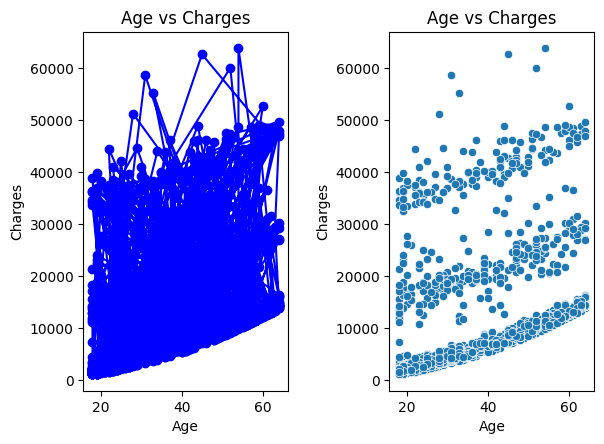

In [30]:
fig,axes=plt.subplots(1,2)
axes[0].plot(medical_df['age'],medical_df['charges'],'o-b')
axes[0].set_title('Age vs Charges')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Charges')
sns.scatterplot(x='age',y='charges',data=medical_df,ax=axes[1])
axes[1].set_title('Age vs Charges') 
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Charges')
plt.tight_layout(pad=2)
plt.show()

In [31]:
%pip install "nbformat>=4.2.0"

import nbformat
fig=px.histogram(medical_df,
                 x='age',
                 marginal='box',
                 nbins=47,
                 title='Age Distribution')
fig.update_layout(bargap=0.1)
fig.show()

Note: you may need to restart the kernel to use updated packages.


In [32]:
fig=px.histogram(medical_df,
               x='charges',
              marginal='box',
              nbins=47,
              title='Charges Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [33]:
fig=px.histogram(medical_df,
                 x='bmi',
                 marginal ='box',
                 nbins=47,
                 color='smoker',
                 color_discrete_sequence=['green','red'],
                 title='BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [34]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [35]:
medical_df.smoker.describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [36]:
fig=px.histogram(medical_df,
                 x='smoker',
                 color='sex',
                 opacity=1,
                 title='smoker',
                )
fig.show()

In [37]:
fig=px.scatter(medical_df,
               x='age',
               y='charges',
               color='smoker',
               hover_data=['sex','bmi'],
               title='age vs Charges')
fig.update_traces(marker_size=7)
fig.show()

Finding the correlation between two column of the data sets.
**medical_df.charges.corr(medical_df.age)**

In [38]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [39]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [40]:
df_copy=medical_df.copy()
df_copy['sex_number']=medical_df['sex'].map({'male':1,'female':0})
df_copy['smoker_number']=medical_df['smoker'].map({'yes':1,'no':0})
df_copy

,age,sex,bmi,children,smoker,region,charges,sex_number,smoker_number
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [41]:
#df_copy['age','bmi','children','charges','sex_number','smoker_number'].corr()
selected_cols = ['age', 'bmi', 'children', 'charges', 'sex_number', 'smoker_number']
df_copy[selected_cols].corr()


,age,bmi,children,charges,sex_number,smoker_number
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251
sex_number,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185
smoker_number,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000


In [63]:
non_smokers_df=medical_df[medical_df.smoker=="no"]
non_smokers_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


Using linear Regression to estimate charges based on the ages.

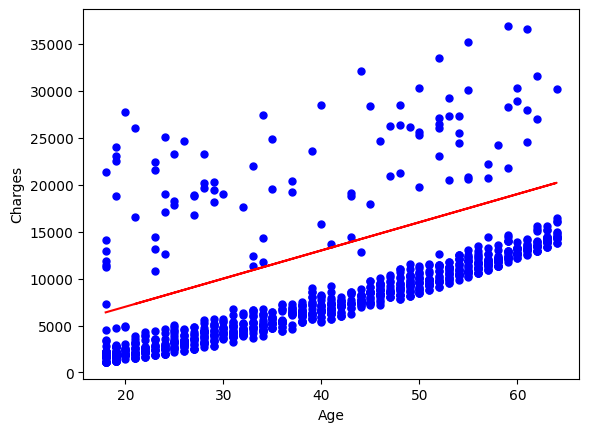

<Figure size 1000x600 with 0 Axes>

In [43]:
def estimate_charges(age,w,b):
    return w*age+b

def try_different_weight(w,b):
    age=non_smokers_df.age
    target=non_smokers_df.charges
    estimated_charges_df=estimate_charges(age,w,b)
    plt.plot(age,estimated_charges_df,c='r',alpha=1)
    plt.scatter(age,target,c='b',alpha=1,s=25)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.figure(figsize=(10,6))
    #print(target)



try_different_weight(300,1000)


In [44]:
model=LinearRegression()
model.fit(non_smokers_df[['age']], non_smokers_df[['charges']])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
predicted_charges=model.predict(non_smokers_df[['age']])
predicted_df=pd.DataFrame(predicted_charges,columns=['predicted_charges'])
predicted_df
#predicted_charges
#rmse(non_smokers_df.charges,predicted_charges)

,predicted_charges
0,2719.059874
1,5391.549003
2,6727.793567
3,6460.544654
4,6193.295741
...,...
1059,11805.522911
1060,11271.025085
1061,2719.059874
1062,2719.059874


In [46]:
rmse = np.sqrt(np.mean(np.square(non_smokers_df[['charges']] - predicted_charges)))
rmse

np.float64(4662.505766636395)

Linear Regression using Multiple Features

In [47]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [64]:
non_smokers_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [65]:
non_smokers_df.columns



Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [67]:
non_smokers_df['non_smokers']=non_smokers_df['smoker'].map({'yes':1, 'no':0})
non_smokers_df


C:\Users\DELL\AppData\Local\Temp\ipykernel_151740\2369133335.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,bmi,children,smoker,region,charges,non_smokers
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
5,31,female,25.740,0,no,southeast,3756.62160,0
...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0


In [74]:
non_smokers_df['non_smokers']

1       0
2       0
3       0
4       0
5       0
       ..
1332    0
1333    0
1334    0
1335    0
1336    0
Name: non_smokers, Length: 1064, dtype: int64

In [75]:
input=non_smokers_df[['age','bmi','children','non_smokers']]
target=non_smokers_df[['charges']]

model=LinearRegression()
model.fit(input,target)
prediction=model.predict(input)

print(prediction)

rmse=np.sqrt(np.mean(np.square(target - prediction)))
rmse

[[2724.94209163]
 [6535.13457204]
 [6065.27173951]
 ...
 [2134.51524931]
 [2160.54349555]
 [2898.08585583]]


np.float64(4608.470405038246)

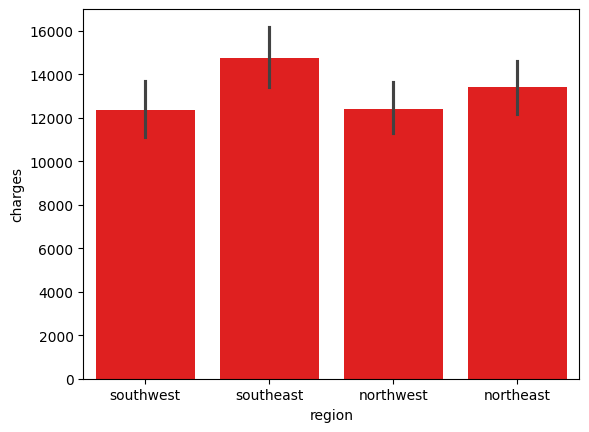

In [88]:
sns.barplot(x='region',y='charges',color='r',data=medical_df);


In [91]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
print(enc.categories_)
one_enc=enc.transform(medical_df[['region']]).toarray()
one_enc


[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [92]:
medical_df[['northeast','northwest','southeast','southwest']]=one_enc
medical_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,1.0


In [94]:
selected=['age','bmi','children','northeast','northwest','southeast','southwest']
medical_df[selected].corr()

,age,bmi,children,northeast,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,-0.022808,0.024806,-0.023066,0.021914
northeast,0.002475,-0.138156,-0.022808,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.135996,0.024806,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.320177,-0.320829,-0.346265,1.000000


In [96]:
medical_df['smokers_no']=medical_df['smoker'].map({'yes':1,'no':0})
medical_df['sex_no']=medical_df['sex'].map({'male':1,'female':0})
medical_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,smokers_no,sex_no
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,0.0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,0.0,0.0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,1.0,0.0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,1.0,0,0


In [99]:
inputs=medical_df[['age','bmi','children','northeast','northwest','southeast','southwest','smokers_no','sex_no']]
target=medical_df[['charges']]

model=LinearRegression()
model.fit(inputs,target)
predicted=model.predict(inputs)
print(predicted)
rmse=np.sqrt(np.mean(np.square(target - predicted)))
rmse

[[25293.7130284 ]
 [ 3448.60283431]
 [ 6706.9884907 ]
 ...
 [ 4149.13248568]
 [ 1246.58493898]
 [37085.62326757]]


np.float64(6041.6796511744515)

In [101]:
from sklearn.preprocessing import StandardScaler

numeric_cols=['age','bmi','children','charges']
scaler=StandardScaler()
scaler.fit(medical_df[numeric_cols])
sec=scaler.transform(medical_df[numeric_cols])
sec


array([[-1.43876426, -0.45332   , -0.90861367,  0.2985838 ],
       [-1.50996545,  0.5096211 , -0.07876719, -0.95368917],
       [-0.79795355,  0.38330685,  1.58092576, -0.72867467],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, -0.96159623],
       [-1.29636188, -0.79781341, -0.90861367, -0.93036151],
       [ 1.55168573, -0.26138796, -0.90861367,  1.31105347]],
      shape=(1338, 4))

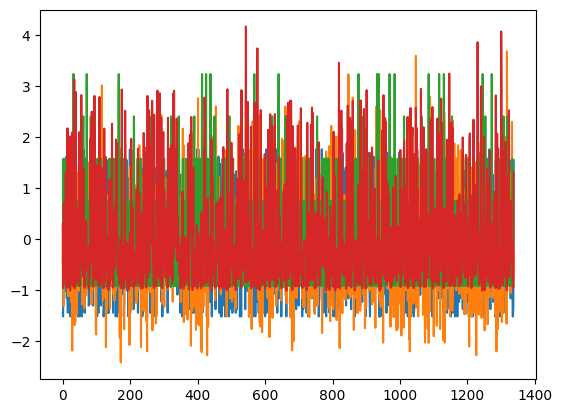